In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import datacube
dc = datacube.Datacube()

In [2]:
product = 'black_marble_night_lights'

In [3]:
meas_info = dc.list_measurements()

In [4]:
nodata_vals = meas_info.loc[product]['nodata']

In [5]:
data = dc.load(product=product, time=('2015-01-01', '2015-01-31'), 
               measurements=['DNB_BRDF_corrected_NTL', 'mandatory_quality_flag',
                             'QF_cloud_mask'], dask_chunks=dict(time=1, latitude=2000, longitude=2000))

In [6]:
clean_mask = data['DNB_BRDF_corrected_NTL'] != nodata_vals['DNB_BRDF_corrected_NTL']

In [7]:
data = data.where(clean_mask)

**Show the mean of the data**

/env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


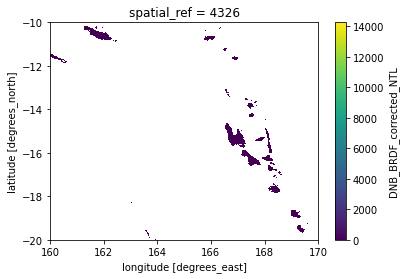

In [8]:
data['DNB_BRDF_corrected_NTL'].mean('time').plot.imshow()

**Show each day as an image**

In [9]:
# for time in data['DNB_BRDF_corrected_NTL'].time:
#     data['DNB_BRDF_corrected_NTL'].sel(time=time).plot.imshow()
#     plt.show()